# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as stats
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# Url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units

city_weather = requests.get(query_url)
city_weather = city_weather.json()

# query_url
response = requests.get(query_url + city).json()



In [16]:
# Creating lists as holding variables

lat = []
lng = []
temp = []
temp_max = []
humidity = []
wind_speed = []
date = []
country = []
cloudiness = []

# Loop through the list of cities and request for data on each

print("Beginning Data Retrieval")
print("♦" * 45)

count = 0

for idx, city in enumerate(cities):
    count = count + 1

    print(f"Retrieving city record {count}:  {city}")
    
    try:
        response = requests.get(url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])

    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lng.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)

print("♦" * 45)
print("Data Retrieval is Complete")
print("♦" * 45)


Beginning Data Retrieval
♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦
Retrieving city record 1:  port alfred
Retrieving city record 2:  sentyabrskiy
City not found. Skipping...
Retrieving city record 3:  hilo
Retrieving city record 4:  mahenge
Retrieving city record 5:  saldanha
Retrieving city record 6:  butaritari
Retrieving city record 7:  tilichiki
Retrieving city record 8:  saint george
Retrieving city record 9:  ponta do sol
Retrieving city record 10:  skagastrond
City not found. Skipping...
Retrieving city record 11:  kodiak
Retrieving city record 12:  avarua
Retrieving city record 13:  albany
Retrieving city record 14:  sorland
Retrieving city record 15:  araouane
Retrieving city record 16:  ushuaia
Retrieving city record 17:  aksarka
Retrieving city record 18:  amderma
City not found. Skipping...
Retrieving city record 19:  barrow
Retrieving city record 20:  sisimiut
Retrieving city record 21:  polyarnyy
Retrieving city record 22:  galle
Retrieving city record 23:  bluff
Retr

Retrieving city record 201:  evreux
Retrieving city record 202:  awbari
Retrieving city record 203:  pathein
Retrieving city record 204:  kijang
Retrieving city record 205:  saskylakh
Retrieving city record 206:  tuatapere
Retrieving city record 207:  anori
Retrieving city record 208:  baiyin
Retrieving city record 209:  ardistan
City not found. Skipping...
Retrieving city record 210:  muros
Retrieving city record 211:  khonuu
City not found. Skipping...
Retrieving city record 212:  ambilobe
Retrieving city record 213:  ardakan
Retrieving city record 214:  pauini
Retrieving city record 215:  saint-pierre
Retrieving city record 216:  luwuk
Retrieving city record 217:  anadyr
Retrieving city record 218:  yakeshi
Retrieving city record 219:  walvis bay
Retrieving city record 220:  los llanos de aridane
Retrieving city record 221:  cherskiy
Retrieving city record 222:  kuala terengganu
Retrieving city record 223:  tiksi
Retrieving city record 224:  juneau
Retrieving city record 225:  inham

Retrieving city record 402:  alice springs
Retrieving city record 403:  guangyuan
Retrieving city record 404:  bonfim
Retrieving city record 405:  ancud
Retrieving city record 406:  diamantino
Retrieving city record 407:  soe
Retrieving city record 408:  ust-ishim
Retrieving city record 409:  hambantota
Retrieving city record 410:  airai
Retrieving city record 411:  nerang
Retrieving city record 412:  bagotville
Retrieving city record 413:  weatherford
Retrieving city record 414:  matara
Retrieving city record 415:  placido de castro
Retrieving city record 416:  kasongo-lunda
Retrieving city record 417:  gannavaram
Retrieving city record 418:  verkhnyaya toyma
Retrieving city record 419:  el faiyum
City not found. Skipping...
Retrieving city record 420:  bay roberts
Retrieving city record 421:  caconda
Retrieving city record 422:  qaqortoq
Retrieving city record 423:  berlevag
Retrieving city record 424:  hervey bay
Retrieving city record 425:  sovetskiy
Retrieving city record 426:  so

Retrieving city record 607:  royan
Retrieving city record 608:  askarovo
Retrieving city record 609:  kenai
Retrieving city record 610:  kondopoga
Retrieving city record 611:  korisos
Retrieving city record 612:  half moon bay
Retrieving city record 613:  mango
Retrieving city record 614:  kirakira
Retrieving city record 615:  ituni
City not found. Skipping...
Retrieving city record 616:  salalah
Retrieving city record 617:  lichuan
Retrieving city record 618:  coolum beach
Retrieving city record 619:  listvyanskiy
Retrieving city record 620:  borlange
City not found. Skipping...
Retrieving city record 621:  turukhansk
Retrieving city record 622:  tuyen quang
Retrieving city record 623:  dumai
Retrieving city record 624:  nichinan
Retrieving city record 625:  regina
Retrieving city record 626:  clonakilty
Retrieving city record 627:  kristiansund
Retrieving city record 628:  puerto colombia
Retrieving city record 629:  zhigansk
Retrieving city record 630:  hirna
Retrieving city record 

In [39]:
print(len(lat))
print(len(temp))


638
638


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
# Convert raw data to dataframe.
city_weather_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "lng": lng,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# Drop any cities that were skipped because they could not be found using the OpenWeatherMap API.
city_weather_df = city_weather_df.dropna(how="any")

print(city_weather_df.count())


City          587
Lat           587
lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64


In [19]:
# Export the city data into a .csv file.
city_weather_df.to_csv("./output_data/city_weather_data.csv", index=False)

# Display the DataFrame
weather_df = pd.read_csv("./output_data/city_weather_data.csv")

weather_df

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,65.77,30.0,99.0,8.90,ZA,1.627776e+09
1,hilo,19.7297,-155.0900,80.11,78.0,60.0,8.01,US,1.627776e+09
2,mahenge,-8.6833,36.7167,61.90,63.0,93.0,3.83,TZ,1.627776e+09
3,saldanha,-33.0117,17.9442,55.45,68.0,36.0,6.26,ZA,1.627776e+09
4,butaritari,3.0707,172.7902,82.08,74.0,38.0,8.93,KI,1.627776e+09
...,...,...,...,...,...,...,...,...,...
582,diffa,13.3154,12.6113,82.26,60.0,87.0,6.76,NE,1.627776e+09
583,douala,4.0483,9.7043,75.04,92.0,100.0,2.04,CM,1.627776e+09
584,lamar,33.6668,-95.5836,95.65,53.0,1.0,6.91,US,1.627776e+09
585,kristiinankaupunki,62.2743,21.3760,56.64,92.0,100.0,5.14,FI,1.627776e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
#  Get the indices of cities that have humidity over 100%.
humidity_100 = weather_df["Humidity"] > 100
humidity_100.value_counts()


False    587
Name: Humidity, dtype: int64

In [21]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# NO OUTLIERS EXISTS

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

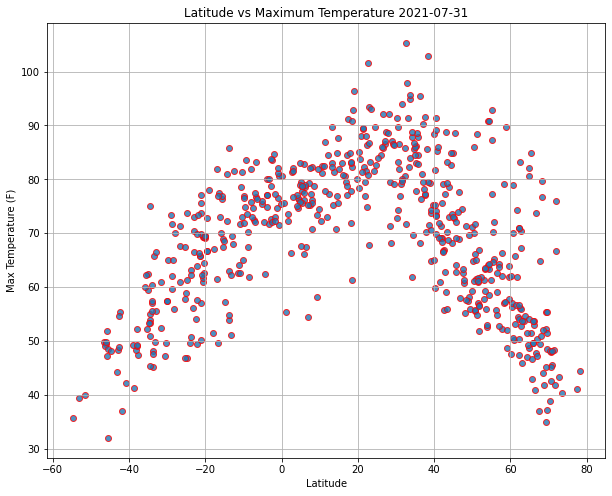

In [25]:
date_time = datetime.date(datetime.now())

# Create a scatter plot for latitude vs max temperature.

x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values, alpha = 0.80, edgecolors = "r", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"Latitude vs Maximum Temperature {date_time}")
plt.grid()
plt.savefig("./output_data/latitude_vs_temperature.png")
plt.show()


# Latitude vs. Humidity Plot

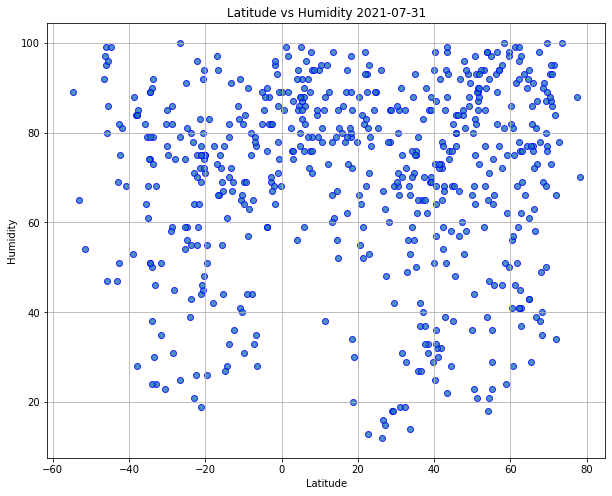

In [26]:
date_time = datetime.date(datetime.now())

# Create a scatter plot for latitude vs max Humidity.
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values, alpha = 0.80, edgecolors = "b", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"Latitude vs Humidity {date_time}")
plt.grid()
plt.savefig("./output_data/latitude_vs_Humidity.png")
plt.show()


# Latitude vs. Cloudiness Plot

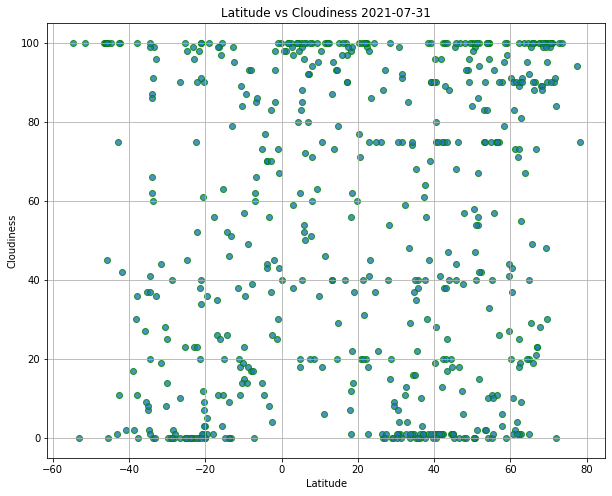

In [27]:
date_time = datetime.date(datetime.now())

# Create a scatter plot for latitude vs max Cloudiness.
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values, alpha = 0.80, edgecolors = "g", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f"Latitude vs Cloudiness {date_time}")
plt.grid()
plt.savefig("./output_data/latitude_vs_Cloudiness.png")
plt.show()


# Latitude vs. Wind Speed Plot

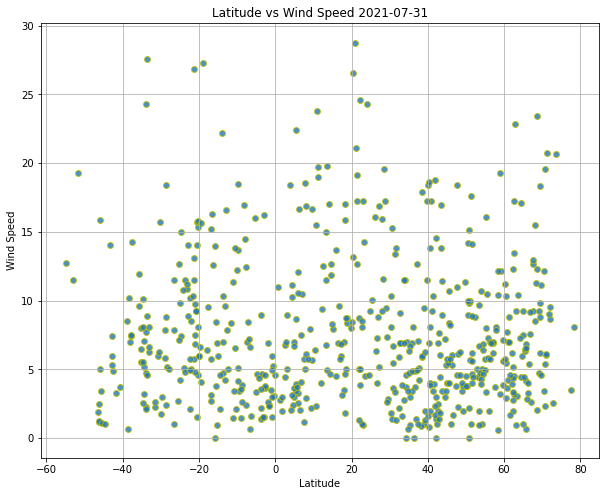

In [28]:
ate_time = datetime.date(datetime.now())

# Create a scatter plot for latitude vs Wind Speed.
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values, alpha = 0.80, edgecolors = "y", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f"Latitude vs Wind Speed {date_time}")
plt.grid()
plt.savefig("./output_data/latitude_vs_Wind Speed.png")
plt.show()

# Linear Regression

In [29]:
# DataFrame for Northen and Southern Hemispheres

northern_hemisphere_weather_df = weather_df.loc[weather_df["Lat"] >= 0]

southern_hemisphere_weather_df = weather_df.loc[weather_df["Lat"] < 0]


In [ ]:
#  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.44x +88.67
The r-value is: 0.4023889590886237


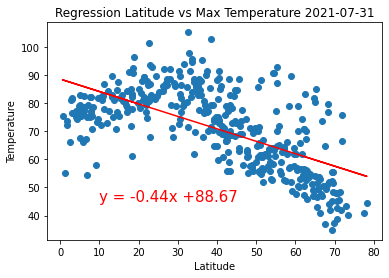

In [31]:

y_values = northern_hemisphere_weather_df["Max Temp"] 
x_values = northern_hemisphere_weather_df["Lat"] 

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title(f"Regression Latitude vs Max Temperature {date_time}")
plt.annotate(line_eq,(10,45),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("./output_data/regression between latitude vs Temperature (northen).png")
# Show plot
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.71x +79.41
The r-value is: 0.630475386998544


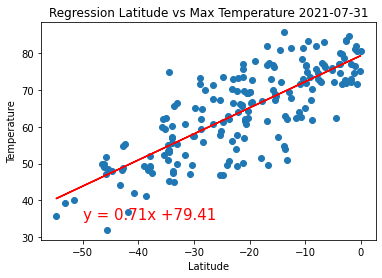

In [32]:
y_values = southern_hemisphere_weather_df["Max Temp"] 
x_values = southern_hemisphere_weather_df["Lat"] 

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title(f"Regression Latitude vs Max Temperature {date_time}")
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("./output_data/regression between latitude vs Temperature (southern).png")
# Show plot
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.09x +74.63
The r-value is: 0.0076914286389100596


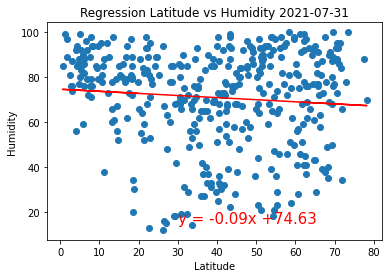

In [33]:
y_values = northern_hemisphere_weather_df["Humidity"] 
x_values = northern_hemisphere_weather_df["Lat"] 

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"Regression Latitude vs Humidity {date_time}")
plt.annotate(line_eq,(30,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("./output_data/regression between latitude vs Humidity (northen).png")

# Show plot
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.01x +68.05
The r-value is: 9.024537203894773e-05


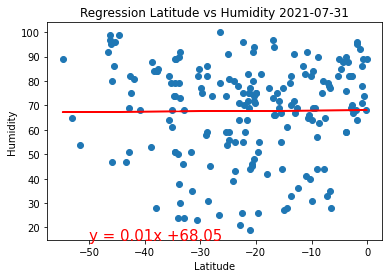

In [34]:
y_values = southern_hemisphere_weather_df["Humidity"] 
x_values = southern_hemisphere_weather_df["Lat"] 

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"Regression Latitude vs Humidity {date_time}")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("./output_data/regression between latitude vs Humidity (southern).png")
# Show plot
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.04x +57.74
The r-value is: 0.0004667641724172971


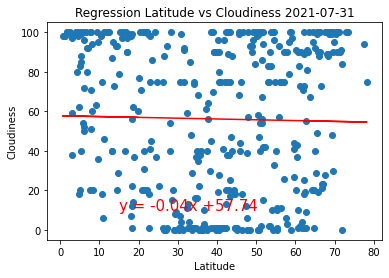

In [35]:
y_values = northern_hemisphere_weather_df["Cloudiness"] 
x_values = northern_hemisphere_weather_df["Lat"] 

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f"Regression Latitude vs Cloudiness {date_time}")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("./output_data/regression between latitude vs Cloudiness (northen).png")

# Show plot
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.01x +43.1
The r-value is: 9.394988732068336e-06


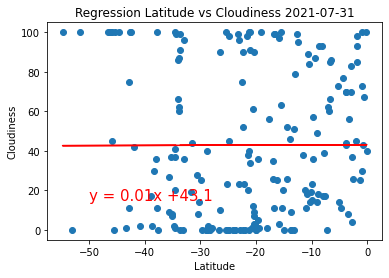

In [36]:
y_values = southern_hemisphere_weather_df["Cloudiness"] 
x_values = southern_hemisphere_weather_df["Lat"] 

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f"Regression Latitude vs Cloudiness {date_time}")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("./output_data/regression between latitude vs Cloudiness (southern).png")

# Show plot
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.02x +8.53
The r-value is: 0.007817453988062401


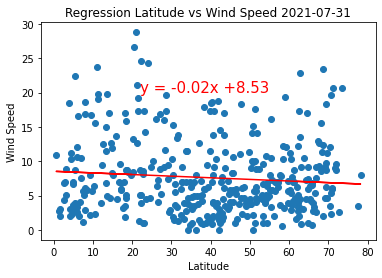

In [37]:
y_values = northern_hemisphere_weather_df["Wind Speed"] 
x_values = northern_hemisphere_weather_df["Lat"] 

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f"Regression Latitude vs Wind Speed {date_time}")
plt.annotate(line_eq,(22,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("./output_data/regression between latitude vs Wind Speed (northen).png")
# Show plot
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.04x +6.69
The r-value is: 0.008243885707456879


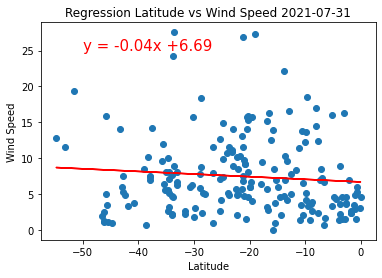

In [38]:
y_values = southern_hemisphere_weather_df["Wind Speed"] 
x_values = southern_hemisphere_weather_df["Lat"] 

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f"Regression Latitude vs Wind Speed {date_time}")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("./output_data/regression between latitude vs Wind Speed (southern).png")

# Show plot
plt.show()
